# K-Means Clustering 

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

** About the Notebook and dataset used **

The notebook helps in understanding K-means clustering using a dataset.
The dataset is about a list of Customers who have done shopping in a mall.

** Problem Statement:**

As a data scientist , you have to find the segments of the customer based on their Annual Income and Spending Score assigned by the retailers in the Mall. There is not pre-existing segment label. 

Such a customer segmentation will be useful for the retailer in figuring out different market strategies on definite/promising customer segments to increase the profit.

** As there is not Y label to predict , it is an unsupervised approach ** 
** We would be using K-means clustering Algorithm to cluster the Customers based on the Annual Income and Spending Score **

In [81]:
df = pd.read_csv("Mall_Customers.csv")

In [82]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


** Data Description ** 
1. CustomerID 
2. Genre : Denotes the Gender 
3. Age
4. Annual Income in Thousand Dollars 
5. Spending score is assigned to customers based on several criteria, amount spent ,number of times they purchased in a year etc.

We would be segmenting the customers on the basis of the last 2 columns of the data.

In [83]:
x = df.iloc[:,[3,4]].values #fetching the values

Plotting the Scatterplot ( X = Annual Inccome , Y = Spending score ) to see the distribution of the data points in two dimensional space.

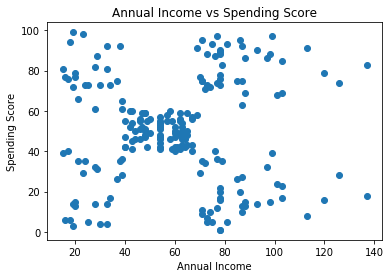

In [84]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

**Inferrence** 
We see a good amount of seggregated data. 
With the above visual , we can assume that the ideal number of clusters to be specified in the algorithm would be around 5 - 7.
We would be verifying the ideal number clusters to specify by fitting the data on repeated iterations on the basis for cluster assumptions.

** Problem solving approach : **

1. We would be running for loop with intial assumption of cluster to be 1 to 11.
2. At each iteration we would calculate the WCSS of each Fit.
3. We would plot a line graph to figure out the optimal number of clusters ( identify the last elbow) of the graph.
4. After obtaining the we would refit the model with the optimal number of clusters and assign labels to the dataset.

In [9]:
from sklearn.cluster import KMeans

In [11]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init= 'k-means++',max_iter=300, n_init= 10,random_state=0)
    kmeans.fit(x) #fitting the data
    wcss.append(kmeans.inertia_) #returns the WCSS value of the each fit 

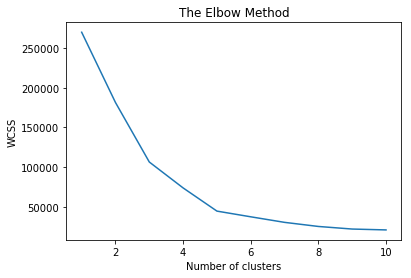

In [69]:
#plotting the elbow curve
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")

We see that the curve saturates towards zero without any abrupt changes from the values ** 5 **.
We choose 5 as the optimal number of clusters. 

In [53]:
#refitting the model 
KM = KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=1,random_state=0)
y_kmeans = KM.fit_predict(x) #fit predict functions returns the cluster name of each value.

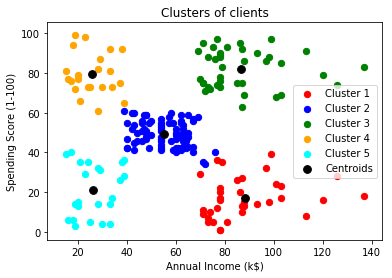

In [87]:
#now lets plot the segments of customers 

plt.scatter(x[y_kmeans == 0,0],x[y_kmeans == 0,1],s = 40 , c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans == 1,1],s = 40 , c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2,1],s = 40 , c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3,0],x[y_kmeans == 3,1],s = 40 , c = 'orange', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4,0],x[y_kmeans == 4,1],s = 40 , c = 'cyan', label = 'Cluster 5')
plt.scatter(KM.cluster_centers_[:,0],KM.cluster_centers_[:,1],s = 60,c = 'black', label = 'Centroids')
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.title('Clusters of clients')
plt.legend(loc = 'best')

** Inferrence ** 

1. Cluster 1 : Customers who have higher Annual Income but spend very less. ** Un-reliable ** 
2. Cluster 2 : Customers who have average Annual Income but carefully spend in shopping : **Potential Customers ** 
3. Cluster 3 : Customers who have good Annual income and spend a lot in shopping : ** Champions **
4. Cluster 4 : Customers have less Annual Income but spend a lot of in shopping : ** Budget Customers **
5. Cluster 5 : Customers who have less annual income and don't shop a lot : ** Inactive Customers ** 

In [88]:
df['Cluster'] = y_kmeans

In [91]:
def namming(col):
    val = col
    if val == 0:
        return "Un-reliable"
    elif val == 1 :
        return "Potential Customers"
    elif val == 2 :
        return "Champions"
    elif val == 3 :
        return "Budget Cust"
    elif val == 4 :
        return "inactive"

In [92]:
df['Segments']=df['Cluster'].apply(namming)

In [94]:
df.drop(['Cluster'],axis = 1, inplace = True)

In [97]:
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Segments
0,1,Male,19,15,39,inactive
1,2,Male,21,15,81,Budget Cust
2,3,Female,20,16,6,inactive
3,4,Female,23,16,77,Budget Cust
4,5,Female,31,17,40,inactive
5,6,Female,22,17,76,Budget Cust
6,7,Female,35,18,6,inactive
7,8,Female,23,18,94,Budget Cust
8,9,Male,64,19,3,inactive
9,10,Female,30,19,72,Budget Cust


In [98]:
pd.value_counts(df['Segments'])

Potential Customers    81
Champions              39
Un-reliable            35
inactive               23
Budget Cust            22
Name: Segments, dtype: int64